In [1]:
import os
from collections import OrderedDict
import logging

%matplotlib inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.table as afwTable

import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

# Load the data

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

mcCalexp = nmf.MulticolorCalExp(filters, imgFilename, catFilename, simFilename)

INFO:lsst.meas.deblender:Loading filter g
INFO:lsst.meas.deblender:Loading filter r
INFO:lsst.meas.deblender:Loading filter i
INFO:lsst.meas.deblender:Loading filter z
INFO:lsst.meas.deblender:Loading filter y
INFO:lsst.meas.deblender:Total parents: 41
INFO:lsst.meas.deblender:Unblended sources: 25
INFO:lsst.meas.deblender:Sources with multiple peaks: 16


# Select a parent object and initialize it

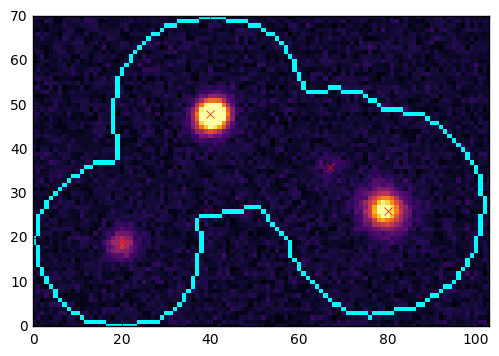

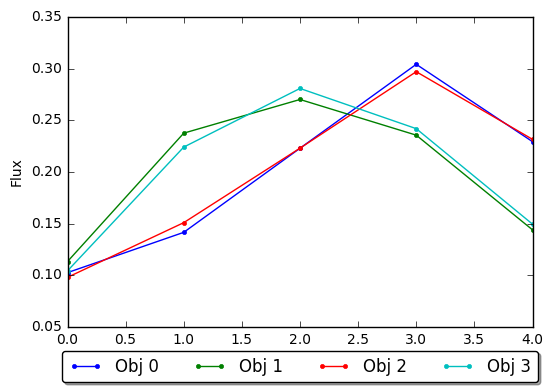

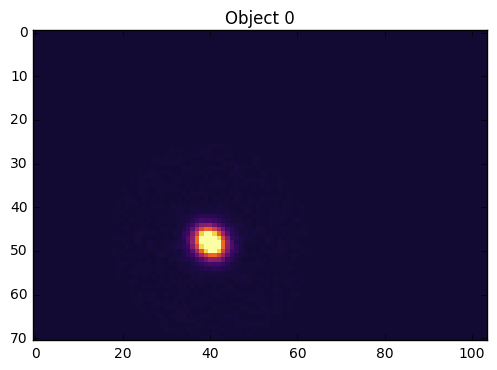

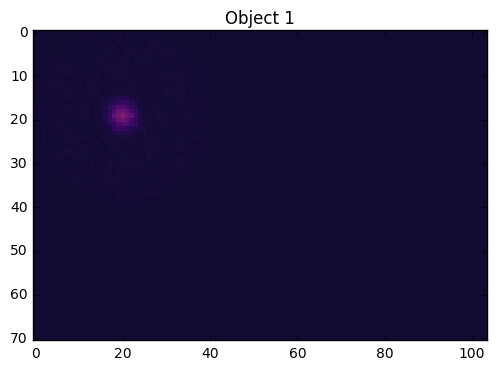

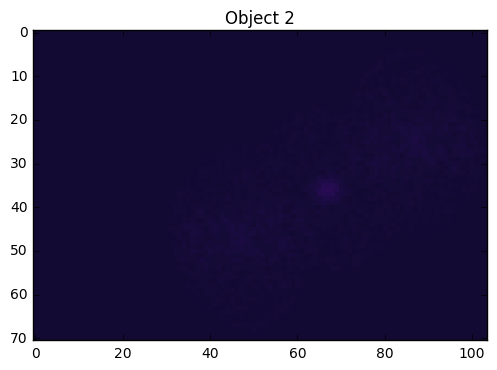

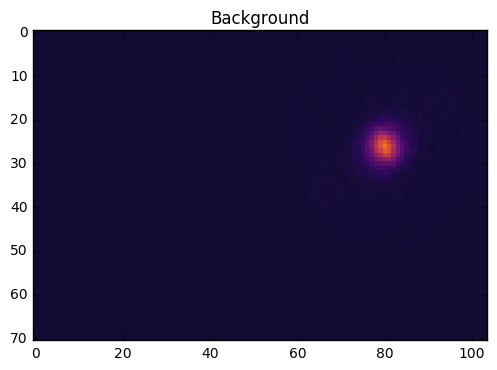

In [ ]:
mcCalexp.getParentFootprint(0, mcCalexp.mergedTable["peaks"]==4, filt='r')
mcCalexp.initNMFParams(includeBkg=False, offsetData=False);

INFO:lsst.meas.deblender:Filter g
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.232974334116
INFO:lsst.meas.deblender:Residual difference 3.0%
INFO:lsst.meas.deblender:Filter r
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.0484245398183
INFO:lsst.meas.deblender:Residual difference 0.4%
INFO:lsst.meas.deblender:Filter i
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.0465570932281
INFO:lsst.meas.deblender:Residual difference 0.3%
INFO:lsst.meas.deblender:Filter z
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.22618436381
INFO:lsst.meas.deblender:Residual difference 1.0%
INFO:lsst.meas.deblender:Filter y
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.165293503924

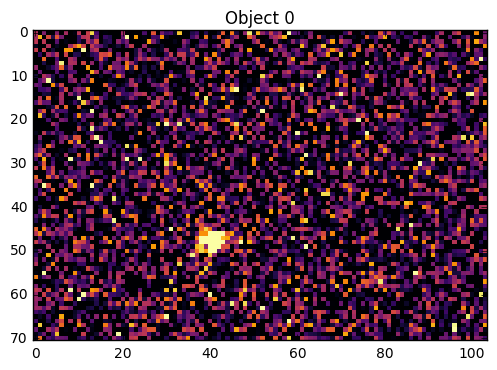

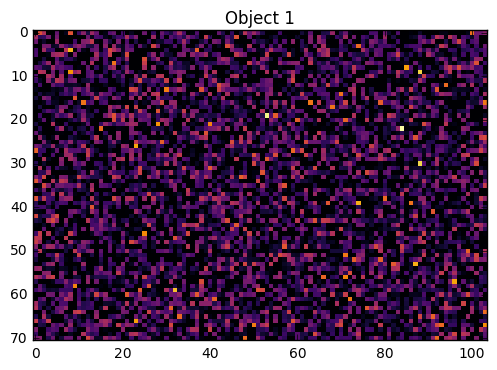

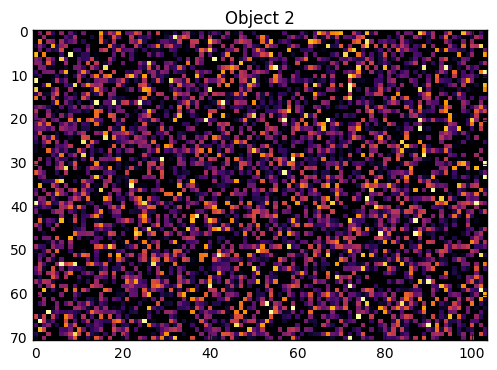

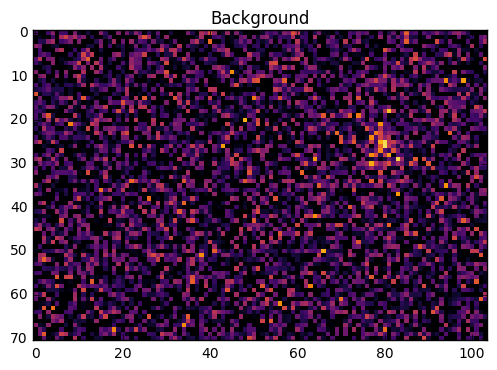

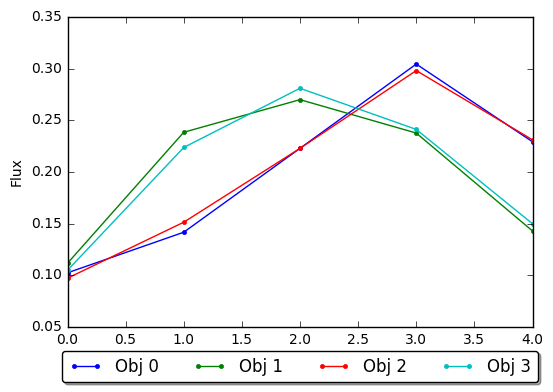

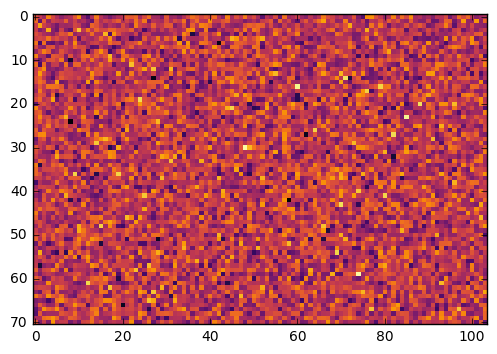

In [8]:
W,H = mcCalexp.deblend(nmfUpdateFunc=nmf.inverseUpdate, steps=20)